

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever.

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [6]:
# %pip install --upgrade plotly

### Import Statements

In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [8]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [9]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', parse_dates=['date'])

# Preliminary Data Exploration

Check out these two DataFrames ☝️.
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [10]:
df_yearly.shape

(12, 4)

In [11]:
df_yearly.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

In [12]:
display(df_yearly.nsmallest(columns = 'year', n = 1))

,year,births,deaths,clinic
0,1841,3036,237,clinic 1


In [13]:
display(df_yearly.nlargest(columns = 'year', n = 1))

,year,births,deaths,clinic
5,1846,4010,459,clinic 1


In [14]:
df_monthly.shape

(98, 3)

In [15]:
df_monthly.columns

Index(['date', 'births', 'deaths'], dtype='object')

In [16]:
df_monthly.head(1)

,date,births,deaths
0,1841-01-01,254,37


### Check for Nan Values and Duplicates

In [17]:
df_monthly.isna().values.any()

np.False_

In [18]:
df_monthly.duplicated().values.any()

np.False_

In [19]:
df_yearly.duplicated().values.any()

np.False_

In [20]:
df_yearly.isna().values.any()

np.False_

### Descriptive Statistics

In [21]:
df_monthly.describe()

,date,births,deaths
count,98,98.00,98.00
mean,1845-02-11 04:24:29.387755008,267.00,22.47
min,1841-01-01 00:00:00,190.00,0.00
25%,1843-02-08 00:00:00,242.50,8.00
50%,1845-02-15 00:00:00,264.00,16.50
75%,1847-02-22 00:00:00,292.75,36.75
max,1849-03-01 00:00:00,406.00,75.00
std,NaN,41.77,18.14


On average there were about 267 births and 22.47 deaths per month.

### Percentage of Women Dying in Childbirth

How dangerous was childbirth in the 1840s in Vienna?

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [22]:
women_percentage_dying = df_yearly.deaths.sum()/df_yearly.births.sum() * 100

In [23]:
print(f'Women percentage dying in vienaa in 1840s is {women_percentage_dying:.3}')

Women percentage dying in vienaa in 1840s is 7.08


# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

Create a Matplotlib chart with twin y-axes.

* Format the x-axis using locators for the years and months
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively.
* Do you notice anything in the late 1840s?

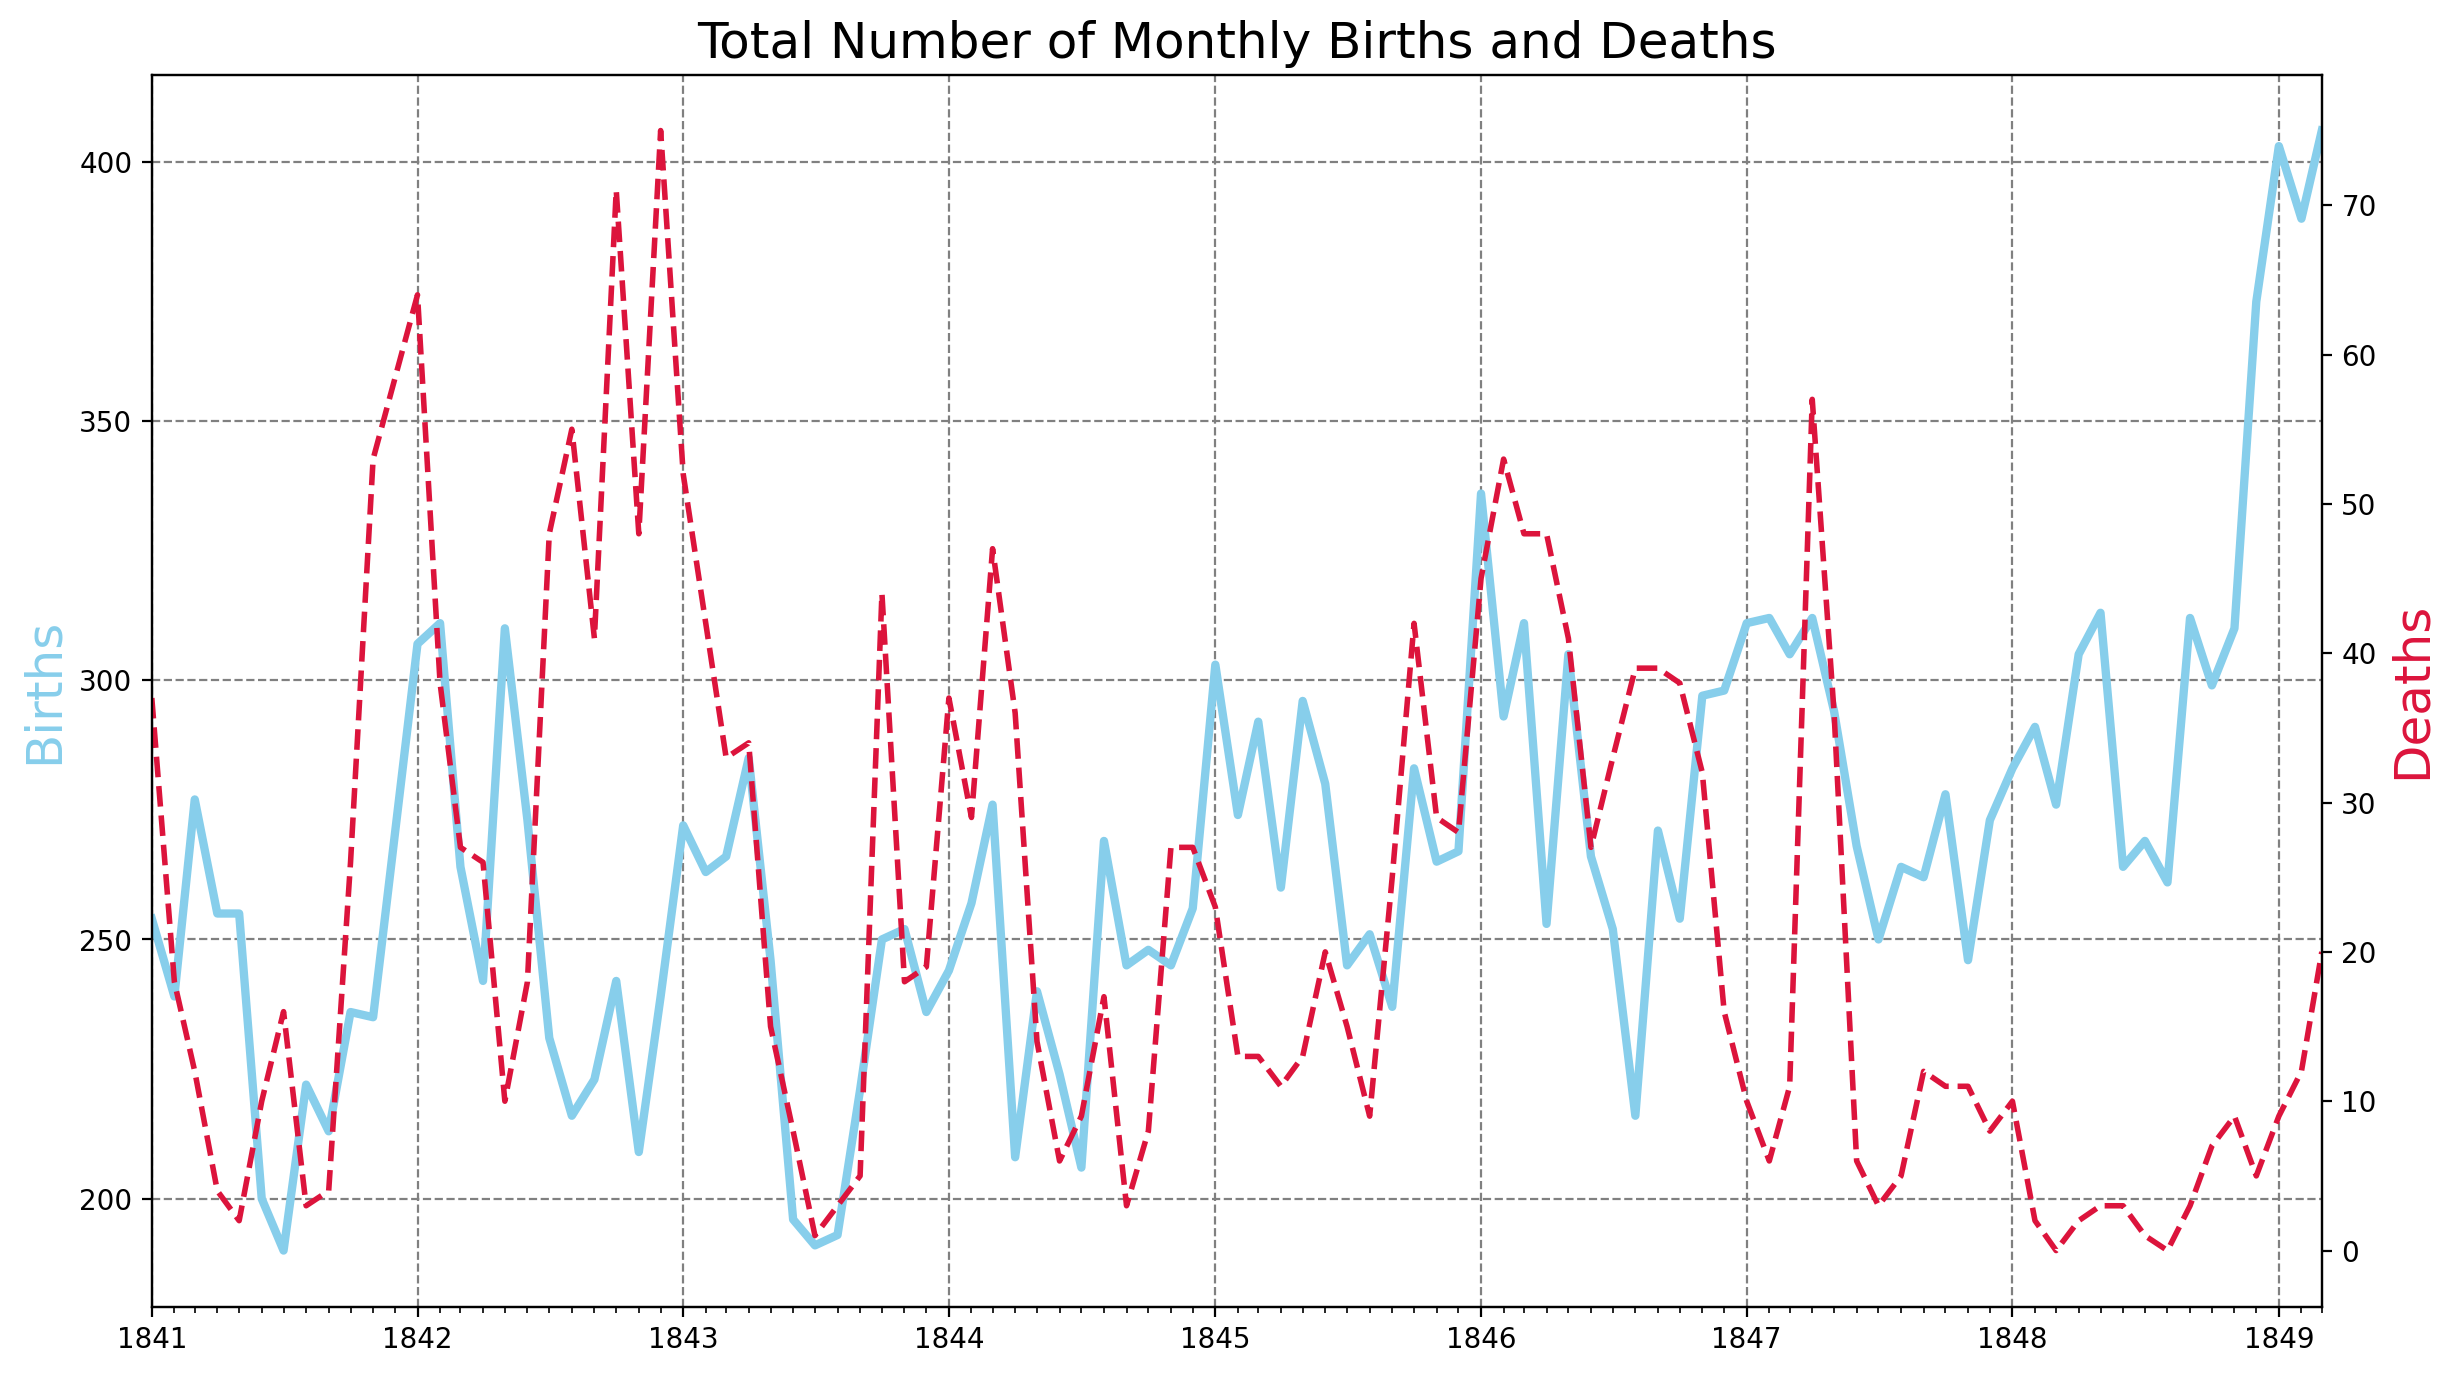

In [24]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.grid(color='grey', linestyle='--')
ax1.set_ylabel('Births', color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)

# Use Locators
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_monthly.date,
         df_monthly.births,
         color='skyblue',
         linewidth=3)

ax2.plot(df_monthly.date,
         df_monthly.deaths,
         color='crimson',
         linewidth=2,
         linestyle='--')



# The Yearly Data Split by Clinic

Now let's look at the annual data instead.

Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital.
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time?
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [25]:
px.line(df_yearly,
        x = 'year',
        y = 'deaths',
        title='Total Yearly Deaths by Clinic',
        color = 'clinic')

In [26]:
px.line(df_yearly,
        x = 'year',
        y = 'births',
        title='Total Yearly Births by Clinic',
        color = 'clinic')

More and more women gave birth at the hospital over the years. Clinic 1, which was staffed by male doctors and medical students was also the busier or simply the larger ward. More births took place in clinic 1 than in clinic 2.

### Calculate the Proportion of Deaths at Each Clinic

Calculate the proportion of maternal deaths per clinic. That way we can compare like with like.
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths".
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [27]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births

In [28]:
clinic1 = df_yearly[df_yearly.clinic == 'clinic 1']
av_clinic1 = clinic1.deaths.sum() / clinic1.births.sum() * 100
av_clinic1

np.float64(9.924159265542361)

In [29]:
clinic2 = df_yearly[df_yearly.clinic == 'clinic 2']
av_clinic2 = clinic2.deaths.sum() / clinic2.births.sum() *100
av_clinic2

np.float64(3.8839862852003826)

### Plotting the Proportion of Yearly Deaths by Clinic

In [30]:
px.line(df_yearly,
        x = 'year',
        y = 'pct_deaths',
        title='Proportion of Yearly Deaths by Clinic',
        color = 'clinic')

The average death rate for the entire time period for clinic 1 is:
9.92%. In comparison, clinic 2 which was staffed by midwives had a much lower death rate of 3.88% over the course of the entire period. Still, clinic 2 had a consistently lower death rate than clinic 1!

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [31]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')


* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row.
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [32]:
df_monthly['pct_deaths'] = df_monthly.deaths / df_monthly.births

In [33]:
df_monthly.columns

Index(['date', 'births', 'deaths', 'pct_deaths'], dtype='object')

In [34]:
df_monthly_before = df_monthly[df_monthly.date < handwashing_start]
df_monthly_after = df_monthly[df_monthly.date >= handwashing_start]

In [35]:
bw_rate = df_monthly_before.deaths.sum() / df_monthly_before.births.sum() * 100
print(f'Average death rate before 1847 was {bw_rate:.4}%')


Average death rate before 1847 was 10.53%


In [37]:
aw_rate = df_monthly_after.deaths.sum() / df_monthly_after.births.sum() *100
print(f'Average death rate before 1847 was {aw_rate:.4}%')


Average death rate before 1847 was 2.153%


### Calculate a Rolling Average of the Death Rate

Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

In [39]:
roll_df = df_monthly_before.set_index('date')

In [40]:
roll_df = roll_df.rolling(window=6).mean()

### Highlighting Subsections of a Line Chart

Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:

<img src=https://i.imgur.com/X6TQe0R.png width=500>

* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line.
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers.

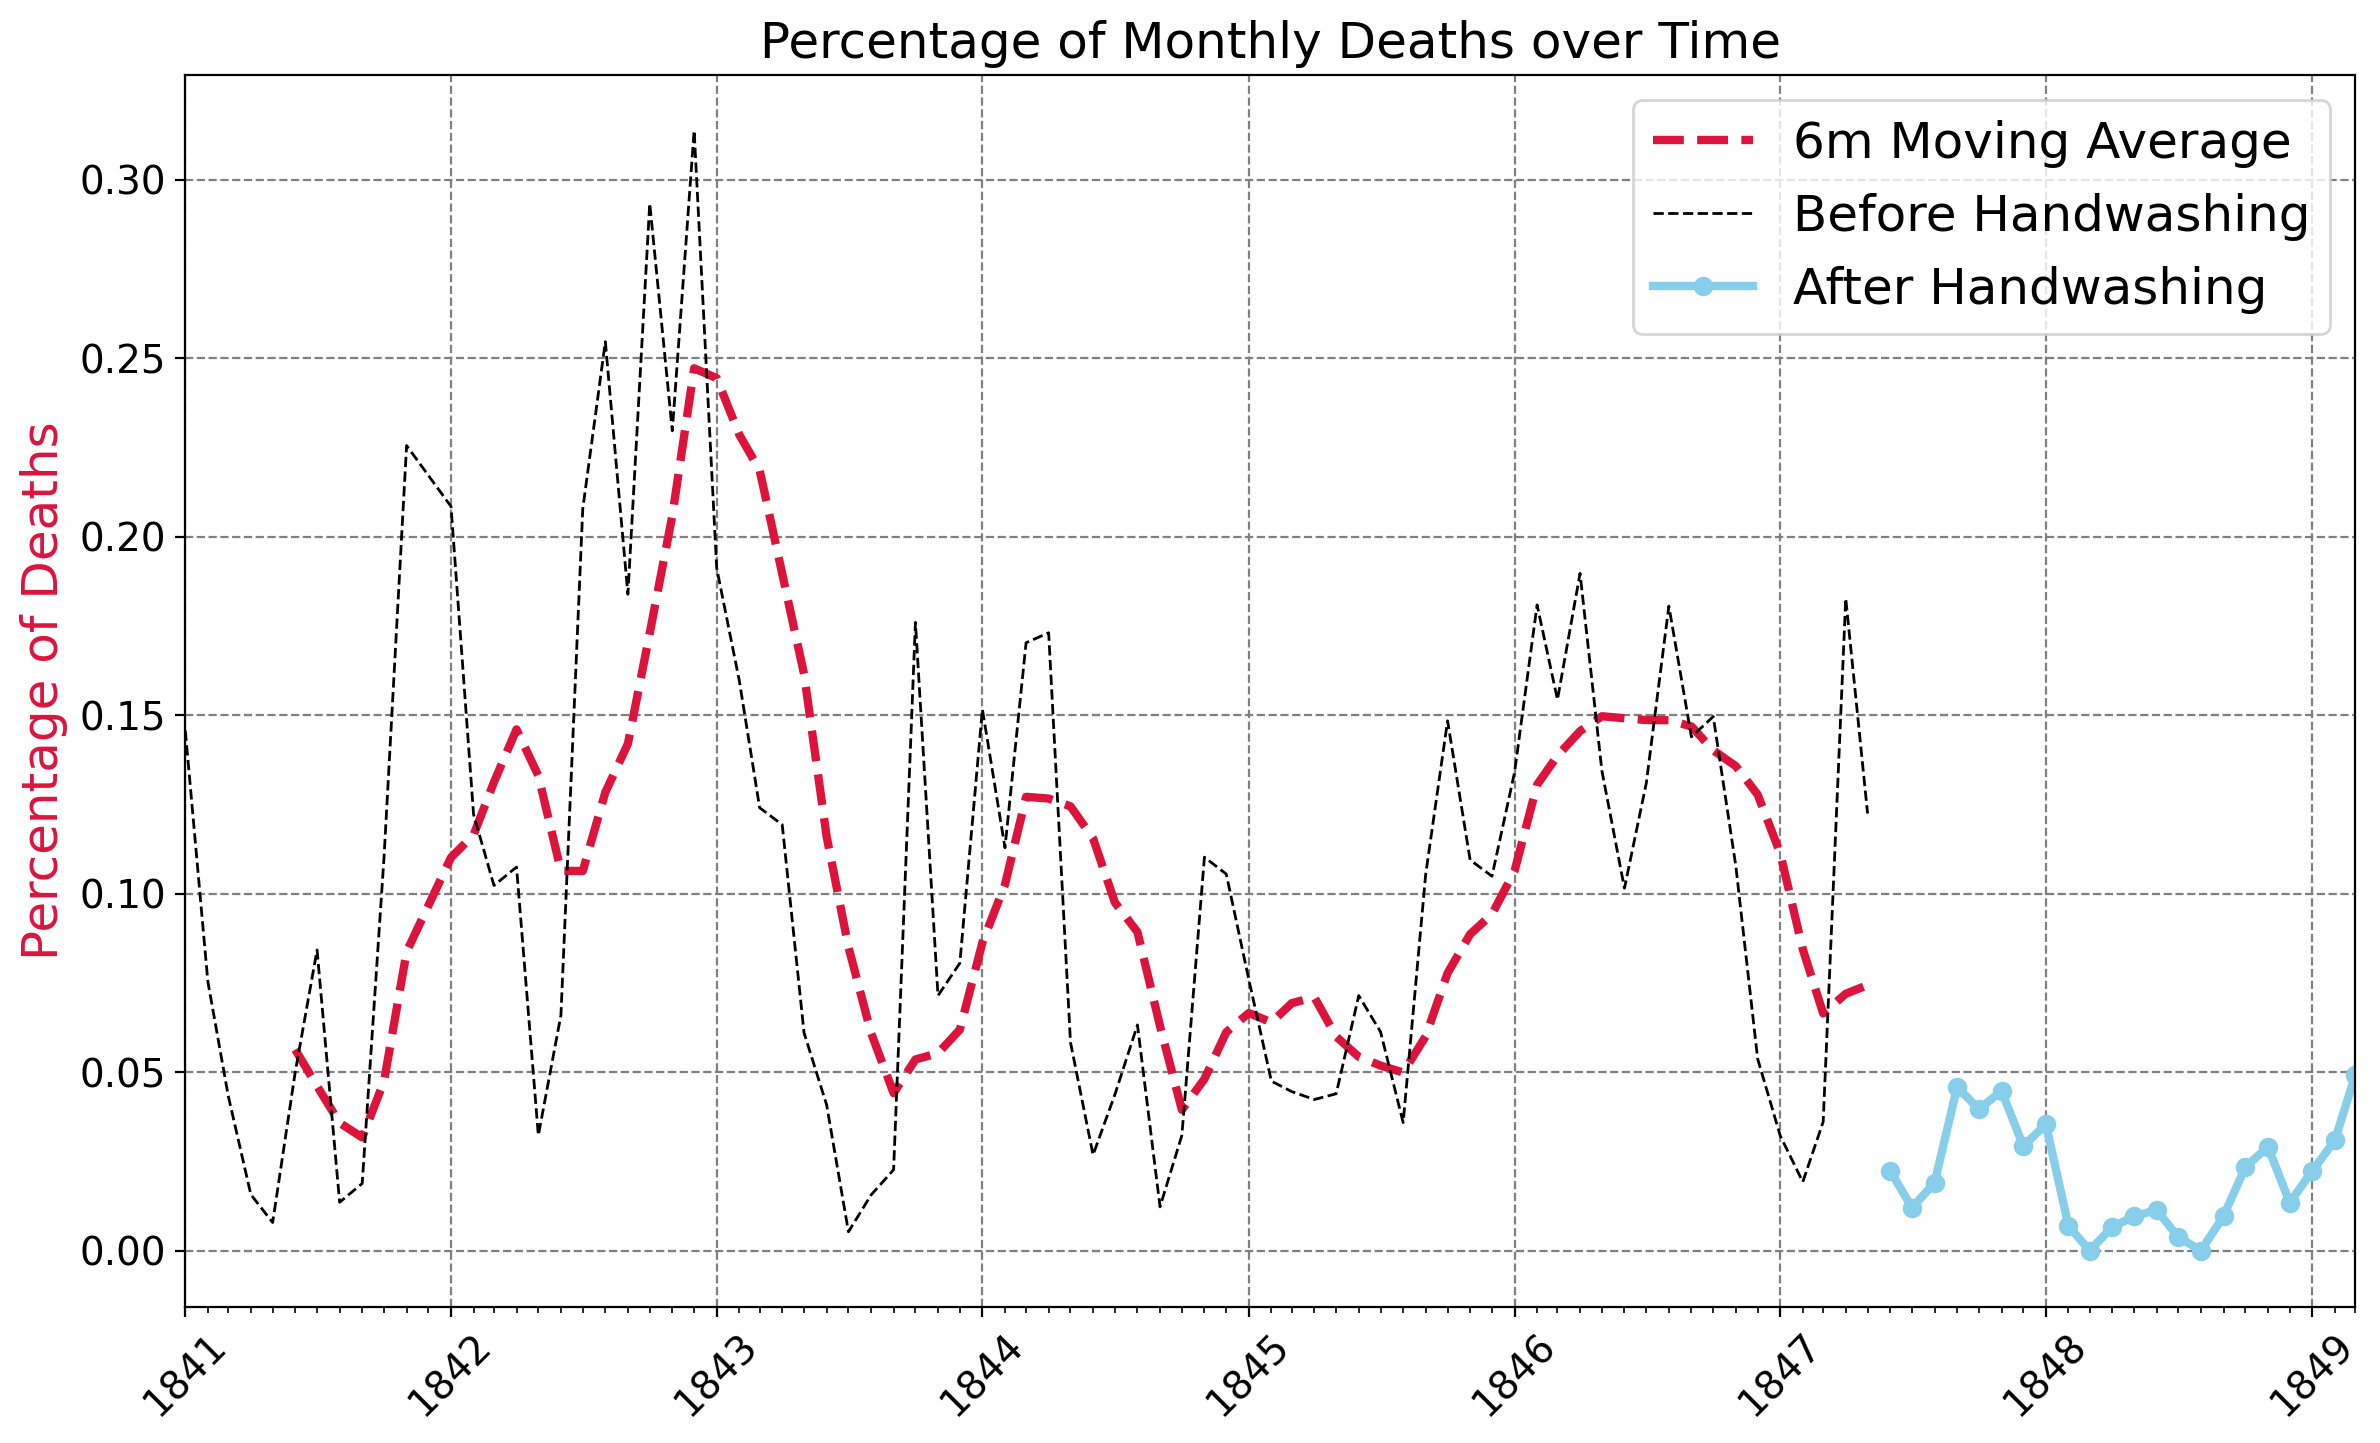

In [42]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)

ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])

plt.grid(color='grey', linestyle='--')

ma_line, = plt.plot(roll_df.index,
                    roll_df.pct_deaths,
                    color='crimson',
                    linewidth=3,
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(df_monthly_before.date,
                    df_monthly_before.pct_deaths,
                    color='black',
                    linewidth=1,
                    linestyle='--',
                    label='Before Handwashing')
aw_line, = plt.plot(df_monthly_after.date,
                    df_monthly_after.pct_deaths,
                    color='skyblue',
                    linewidth=3,
                    marker='o',
                    label='After Handwashing')

plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)

### Statistics - Calculate the Difference in the Average Monthly Death Rate


* What was the average percentage of monthly deaths before handwashing?
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier?
* How many times lower are the chances of dying after handwashing compared to before?

In [43]:
avg_prob_before = df_monthly_before.pct_deaths.mean() * 100
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.3}%.')

avg_prob_after = df_monthly_after.pct_deaths.mean() * 100
print(f'Chance of death during childbirth AFTER handwashing: {avg_prob_after:.3}%.')

mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')

times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')

Chance of death during childbirth before handwashing: 10.5%.
Chance of death during childbirth AFTER handwashing: 2.11%.
Handwashing reduced the monthly proportion of deaths by 8.4%!
This is a 5.0x improvement!


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing


* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing.
* Then use plotly to create box plot of the data before and after handwashing.
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [46]:
df_monthly['washing hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

In [49]:
box = px.box(df_monthly, x = 'washing hands', y = 'pct_deaths', color='washing hands',
             title='How Have the Stats Changed with Handwashing?')
box.update_layout(xaxis_title='Washing Hands?', yaxis_title='Percentage of Monthly Deaths',)

The plot shows us the same data as our Matplotlib chart, but from a different perspective. Here we also see the massive spike in deaths in late 1842. Over 30% of women who gave birth that month died in hospital. What we also see in the box plot is how not only did the average death rate come down, but so did the overall range - we have a lower max and 3rd quartile too.

### Use Histograms to Visualise the Monthly Distribution of Outcomes

Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths.

* Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable.
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter.

In [62]:
hist = px.histogram(df_monthly, x = 'pct_deaths', color ='washing hands', nbins =30, opacity = 0.6, histnorm = 'percent', marginal = 'box')
hist.update_layout(xaxis_title = 'Proportion of Monthly deaths', yaxis_title = 'count')

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after.

* Use the `shade` parameter to give your two distributions different colours.
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem.


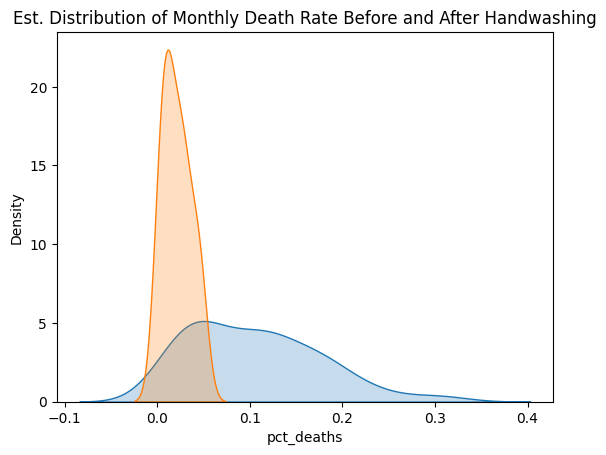

In [65]:
sns.kdeplot(df_monthly_before.pct_deaths, fill = True)
sns.kdeplot(df_monthly_after.pct_deaths, fill = True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

However, the problem is that we end up with a negative monthly death rate on the left tail. The doctors would be very surprised indeed if a corpse came back to life after an autopsy!

(0.0, 0.4)

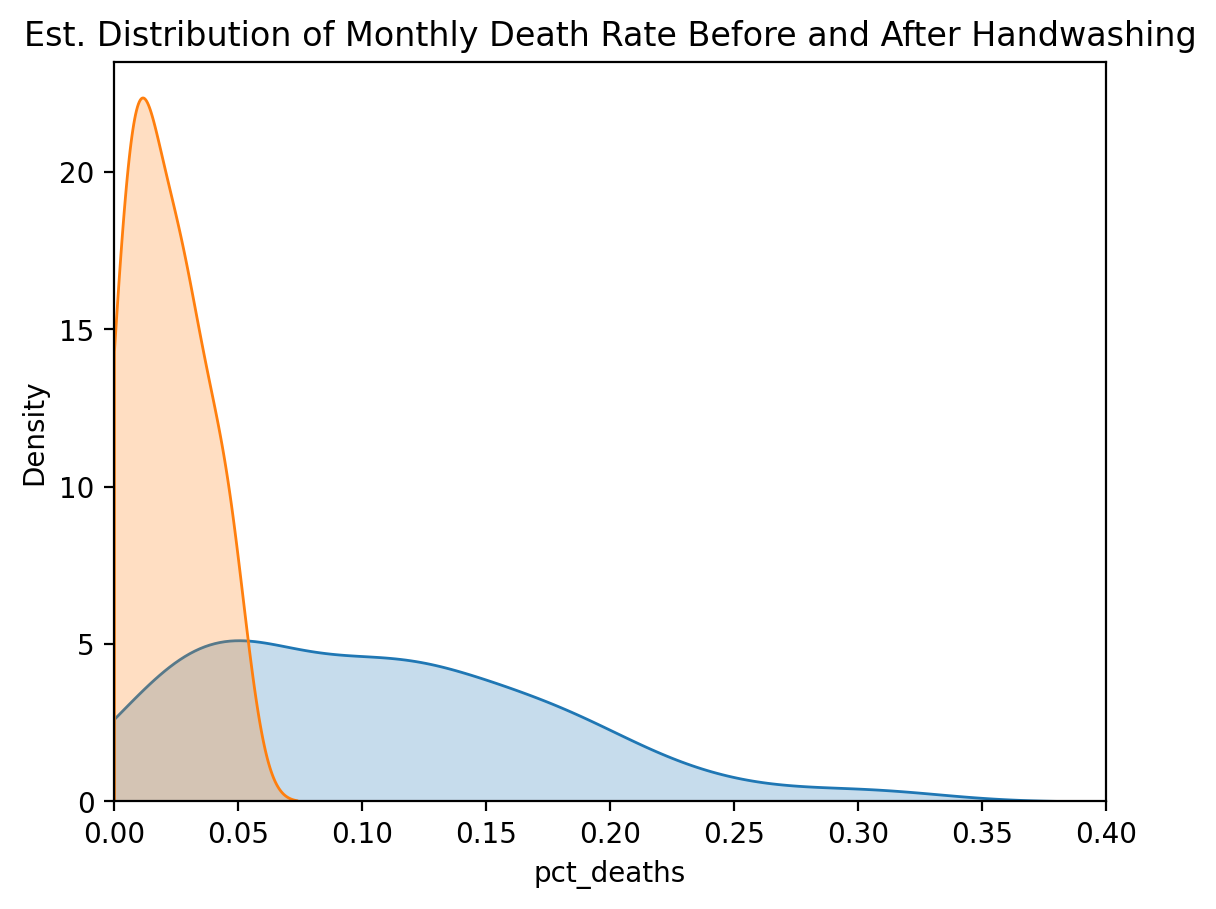

In [67]:
plt.figure(dpi = 200)
sns.kdeplot(df_monthly_before.pct_deaths, fill = True, clip =(0,1))
sns.kdeplot(df_monthly_after.pct_deaths, fill = True, clip =(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)


Now that we have an idea of what the two distributions look like, we can further strengthen our argument for handwashing by using a statistical test. We can test whether our distributions ended up looking so different purely by chance (i.e., the lower death rate is just an accident) or if the 8.4% difference in the average death rate is statistically significant.

### Use a T-Test to Show Statistical Significance

Use a t-test to determine if the differences in the means are statistically significant or purely due to chance.

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate.

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level?



In [68]:
import scipy.stats as stats

In [71]:
t_stat, p_value = stats.ttest_ind(a= df_monthly_before.pct_deaths, b = df_monthly_after.pct_deaths)
print(f'p-value is {p_value:.10f}')
print(f't-statistic is {t_stat:.4}')

p-value is 0.0000002985
t-statistic is 5.512


When we calculate the p_value we see that it is 0.0000002985 or .00002985% which is far below even 1%. In other words, the difference in means is highly statistically significant

What do you conclude from your analysis, Doctor? 😊

<img src=https://i.imgur.com/rvjNVzQ.gif>